## Pima Indian Diabetes Prediction

The aim of this project to analyze the medical factors of a patient such as Glucose Level, Blood Pressure, Skin Thickness, Insulin Level and many others to predict whether the patient has diabetes or not. 

### About the Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Data Dictionary

| Feature | Description |
|---------|------------|
| Pregnancies | Number of times pregnant |
| Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BloodPressure | Diastolic blood pressure (mm Hg) |
| SkinThickness | Triceps skin fold thickness (mm) |
| Insulin | 2-Hour serum insulin (mu U/ml) |
| BMI | Body mass index (weight in kg/(height in m)^2) |
| DiabetesPedigreeFunction | Diabetes pedigree function |
| Age | Age (years) |
| Outcome | Class variable (0 or 1) |

In [173]:
#Importing the libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [174]:
# Loading the dataset
df=pd.read_csv("diabetes.csv")

In [175]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data preprocessing

In [176]:
# shape of my dataset
df.shape

(768, 9)

In [177]:
#structure of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [178]:
#Discriptive statics of my dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [179]:
#null value in my dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [180]:
#checking unique value in mu dataset
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [181]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [182]:
# name of unique value in my dataset
for i in df.columns:
    print("Variabe {}: {}\n".format(i,df[i].unique()))

Variabe Pregnancies: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Variabe Glucose: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

Variabe BloodPressure: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

Variabe SkinThickness: [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17

In the dataset the variables except Pregnancies and Outcome cannot have value as 0, because it is not possible to have 0 Glucose Level or to have 0 Blood Pressure. So, this will be counted as incorrect information

#### Checking the count of value 0 in the variables

In [183]:
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for i in variables:
    c=0
    for x in (df[i]):
        if x==0:
            c+=1
    print(i,c)
    

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


Now, I have count of incoorect values in the variables, I will be replacing these values

In [184]:
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    df[i].replace(0,df[i].mean(),inplace=True)
    


In [185]:
for i in variables:
    c=0
    for x in (df[i]):
        if x==0:
            c+=1
    print(i,c)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


now i have replace the incorrect value

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [187]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


### Exploratory data Analysis
In exploratory data analysis, i am looking at the distribution of the data,the correlation between the feature,and the ralationship between the feature variable.I will start by looking at the distribution of the data ,followed bu relationnship between target variable and independent variable.

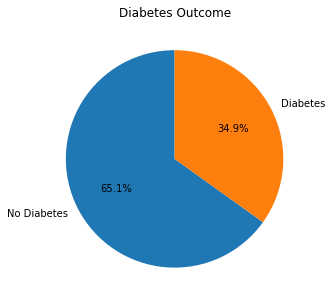

In [188]:
# pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.pie(df["Outcome"].value_counts(), labels=["No Diabetes", "Diabetes"], autopct="%1.1f%%", shadow=False, startangle=90)
plt.title("Diabetes Outcome")
plt.show()


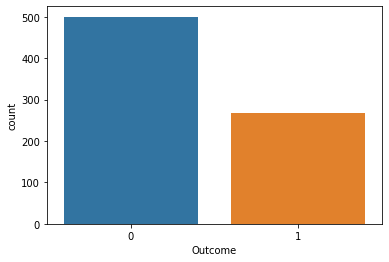

In [189]:
#count plot of outcome
sns.countplot(x="Outcome",data=df)

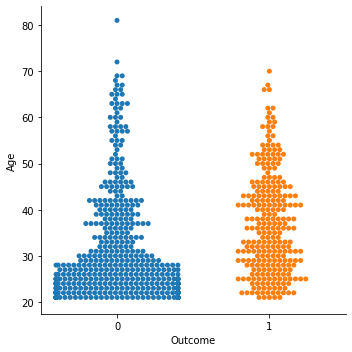

In [190]:
# catplot of the outcome
sns.catplot(x="Outcome",y="Age",kind="swarm",data=df)

From the graph, it is quite clear that majority of the patients are adult within the age group of 20-30 years. Patients in the age range 40-55 years are more prone to diabetes, as compared to other age groups. Since the number adults in the age group 20-30 years is more, the number of patients with diabetes is also more as compared of other age groups.

### Pregnancies and Diabetes

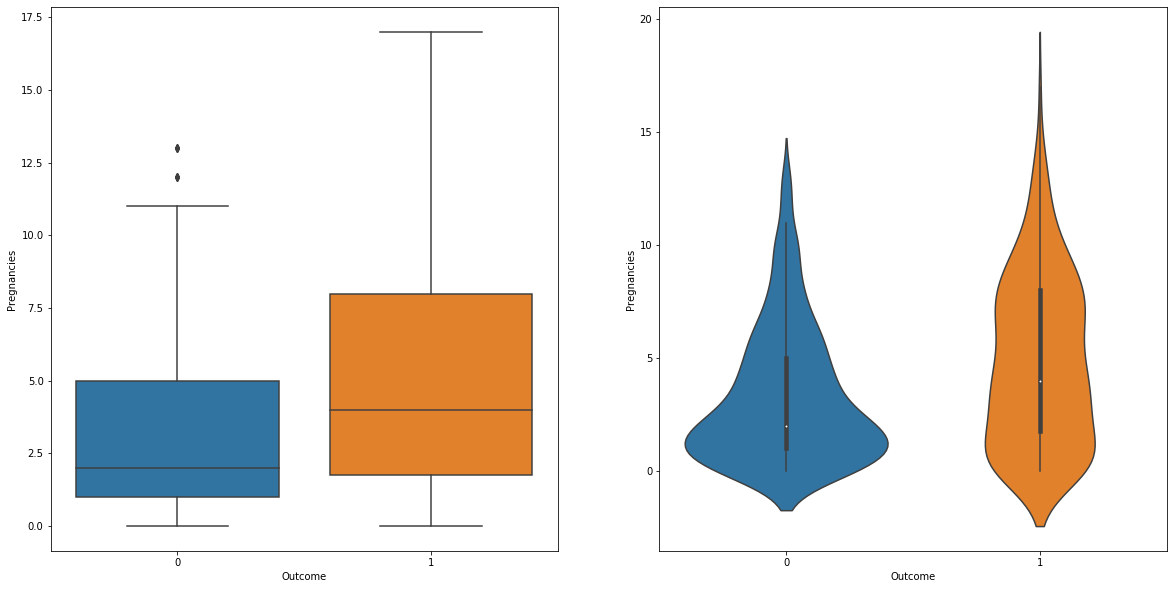

In [191]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.boxplot(x="Outcome",y="Pregnancies",data=df,ax=ax[0])
sns.violinplot(x="Outcome",y="Pregnancies",data=df,ax=ax[1])

Both boxplot and violinplot shows strange relation between the number of preganacies and diabetes. According to the graphs the increased number of pregnancies highlights increased risk of diabetes.

### Glucose and Diabetes

Text(0.5, 1.0, 'Glucose vs. Diabetes')

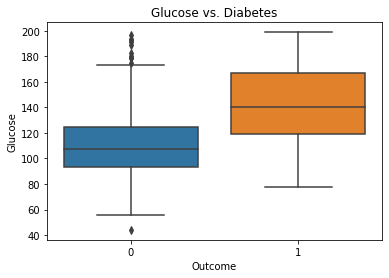

In [192]:
sns.boxplot(x="Outcome",y="Glucose",data=df)
plt.title("Glucose vs. Diabetes")

Glucose level plays a major role in determine whether the patient is diabetic or not. The patients with median gluocse level less than 120 are more likely to be non-diabetic. The patients with median gluocse level greather than 140 are more likely to be diabetic. Therefore, high gluocose levels is a good indicator of diabetes.

### Blood Pressure and Diabetes

Text(0.5, 1.0, 'Blood_Pressure vs.Diabetes')

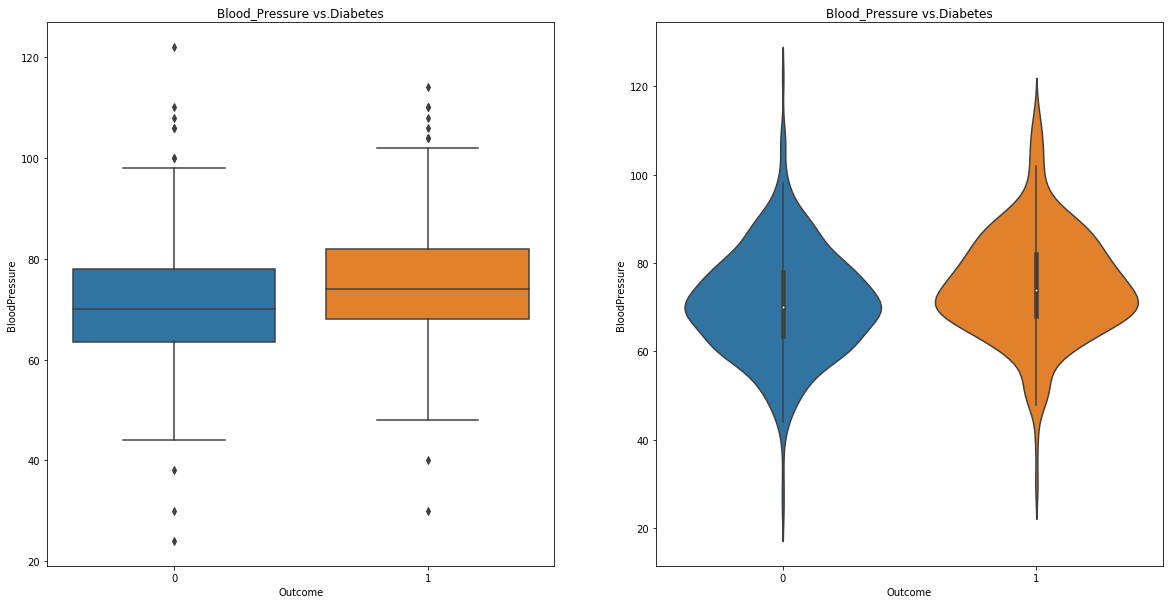

In [193]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.boxplot(x="Outcome",y="BloodPressure",data=df,ax=ax[0]).set_title("Blood_Pressure vs.Diabetes")
sns.violinplot(x="Outcome",y="BloodPressure",data=df,ax=ax[1]).set_title("Blood_Pressure vs.Diabetes")

Both the boxplot and voilinplot provides clear understanding of the realtion between the blood pressure and diabetes. The boxplot shows that the median of the blood pressure for the diabetic patients is slightly higher than the non-diabetic patients. The voilinplot shows that the distribution of the blood pressure for the diabetic patients is slightly higher than the non-diabetic patients. But there has been not enough evidence to conclude that the blood pressure is a good predictor of diabetes.

### Skin Thickness and Diabetes

Text(0.5, 1.0, 'SkinThickness vs Diabetes')

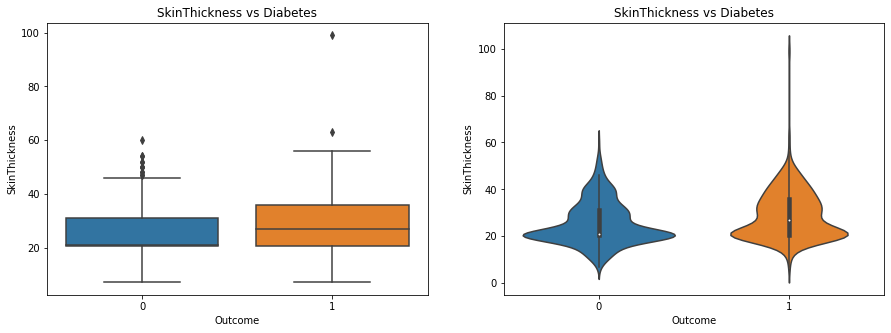

In [194]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='SkinThickness', data=df,ax=ax[0]).set_title('SkinThickness vs Diabetes')
sns.violinplot(x='Outcome', y='SkinThickness', data=df,ax=ax[1]).set_title('SkinThickness vs Diabetes')

Here both the boxplot and violinplot reveals the effect of diabetes on skin thickness. As obserevd in the boxplot, the median of skin thickness is higher for the diabetic patients than the non-diabetic patients, where non diabetic patients have median skin thickness near 20 in comparison to skin thickness nearly 30 in diabetic patients. The voilinpplot shows the distribution of patients' skin thickness amoung the patients, where the non diabetic ones have greater distribution near 20 and diabetic much less distribution near 20 and increased distribution near 30. Therefore, skin thickness can be a indicator of diabetes

### Insulin and Diabetes

Text(0.5, 1.0, 'Insulin vs Diabetes')

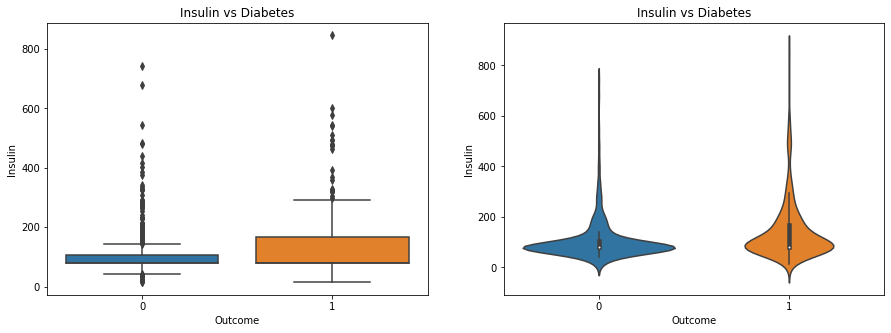

In [195]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Insulin',data=df,ax=ax[0]).set_title('Insulin vs Diabetes')
sns.violinplot(x='Outcome',y='Insulin',data=df,ax=ax[1]).set_title('Insulin vs Diabetes')

Insulin is a major body hormone that regulates glucose metabolism. Insulin is required for the body to efficiently use sugars, fats and proteins. Any change in insulin amount in the body would result in change glucose levels as well. Here the boxplot and violinplot shows the distribution of insulin level in patients. In non diabetic patients the insulin level is near to 100, whereas in diabetic patients the insulin level is near to 200. In the voilinplot we can see that the distribution of insulin level in non diabetic patients is more spread out near 100, whereas in diabetic patients the distribution is contracted and shows a little bit spread in higher insulin levels. This shows that the insulin level is a good indicator of diabetes.

### BMI and Diabetes

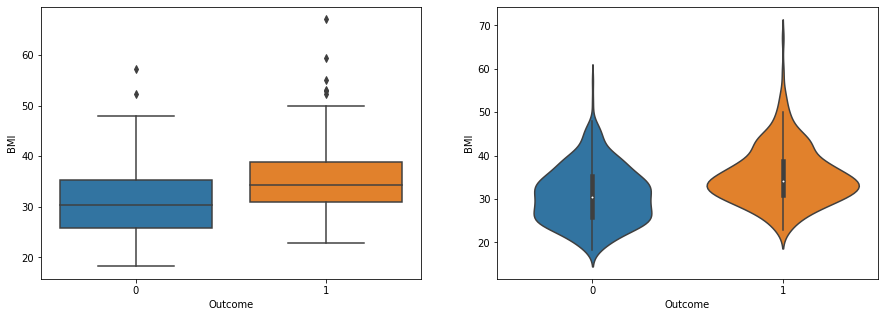

In [196]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='BMI',data=df,ax=ax[0])
sns.violinplot(x='Outcome',y='BMI',data=df,ax=ax[1])

Both graphs highlights the role of BMI in diabetes prediction. Non diabetic patients have a normal BMI within the range of 25-35 whereas the diabetic patients have a BMI greater than 35. The violinplot reveals the BMI distribution, where the non dibetic patients have a increased spread from 25 to 35 with narrows after 35. However in diabetic patients there is increased spread at 35 and increased spread 45-50 as compared to non diabetic patients.Therefore BMI is a good predictor of diabetes and obese people are more likely to be diabetic.

### Diabetes Pedigree Function and Diabetes Outcome

Text(0.5, 1.0, 'Diabetes Pedigree Function')

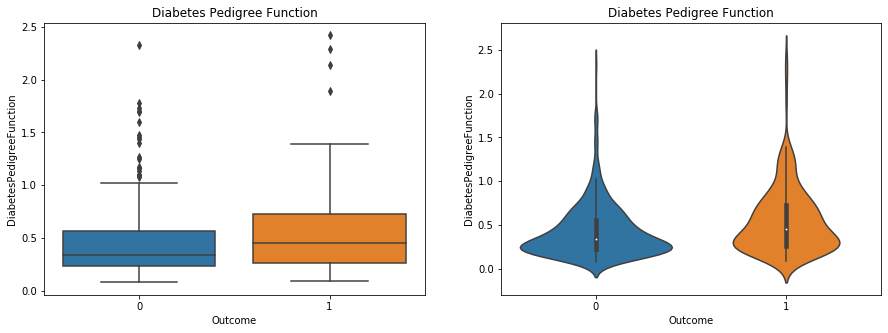

In [197]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,ax=ax[0]).set_title('Diabetes Pedigree Function')
sns.violinplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,ax=ax[1]).set_title('Diabetes Pedigree Function')

Diabetes Pedigree Function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. From the boxplot, the patients with lower DPF, are much less likely to have diabetes. The patients with higher DPF, are much more likely to have diabetes. In the violinplot, majority of the non diabetic patients have a DPF of 0.25-0.35, whereas the diabetic patients have a increased DPF, which is shown by the their distribution in the violinplot where there is a increased spread in the DPF from 0.5 -1.5. Therefore the DPF is a good indicator of diabetes.

Text(0.5, 1, 'Correlation Heatmap')

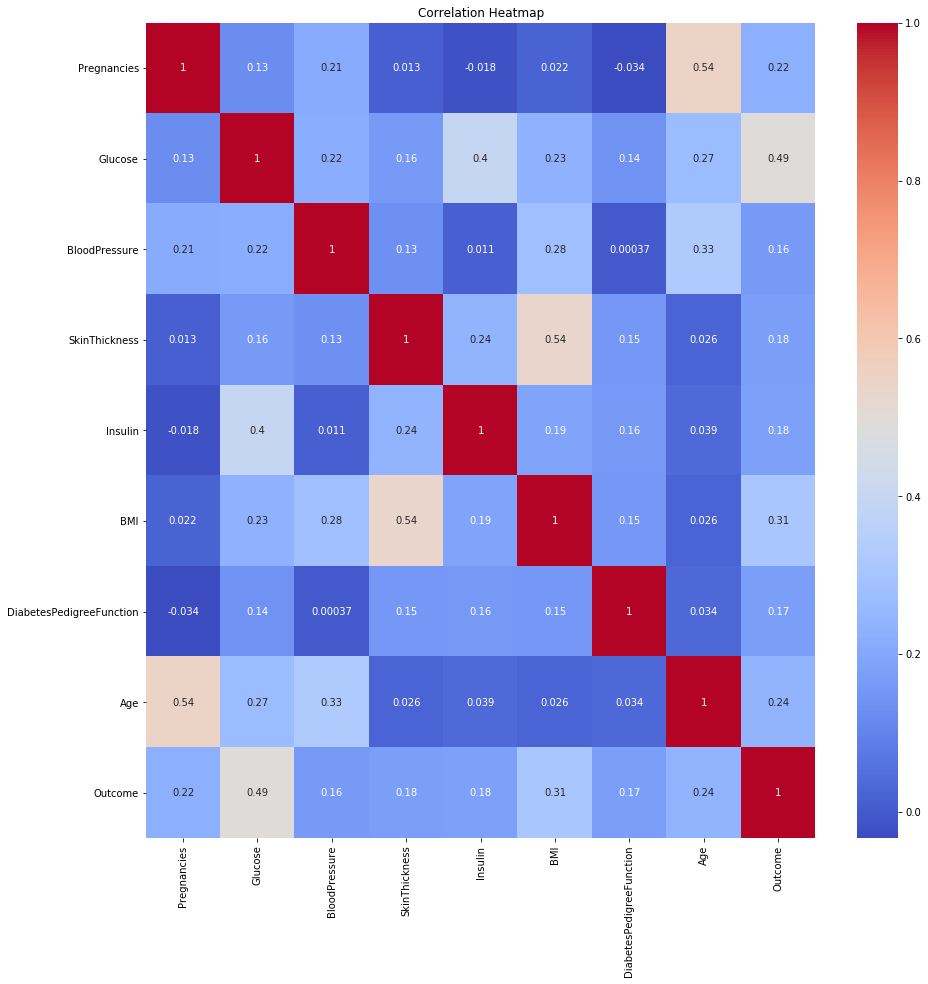

In [198]:
# Correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm").set_title("Correlation Heatmap")

In [199]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [200]:
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

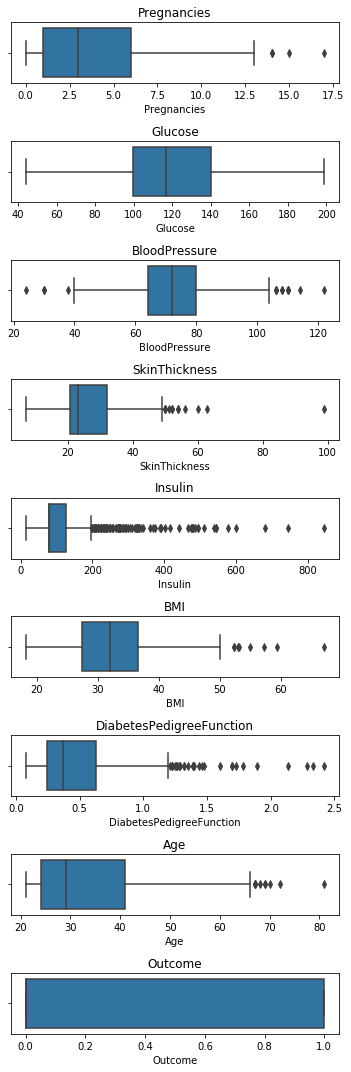

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Create a single-column, multi-row subplot grid based on the number of columns
fig, axes = plt.subplots(len(columns), 1, figsize=(5, 15))

# Loop through the columns and create box plots
for i, column in enumerate(columns):
    sns.boxplot(y=df[column], ax=axes[i], orient='h')  # Use 'orient' to set the orientation to horizontal
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


### Train test split

In [202]:
X=df.drop("Outcome",axis=1)
y=df['Outcome']

In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [204]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)


In [205]:
X_train

array([[-0.52639686, -1.25806262, -0.24875152, ..., -0.05130551,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32713796,  0.81650936, ..., -0.5985773 ,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57053938, -2.15757252, ..., -0.52642693,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69285836,  1.1469629 , ...,  1.91225539,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.637034  , -0.24875152, ...,  1.45049306,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10507706,  1.97309676, ..., -1.42109145,
        -0.61552223, -1.03594038]])

In [206]:
X_test

array([[ 0.68185612, -0.79260029, -1.16621189, ...,  0.23836693,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.32713796,  0.23821566, ...,  0.48367817,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.4601272 , -0.67053158, ..., -0.2233954 ,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.89234222, -0.00962449, ...,  0.64240897,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.80327055, -0.17485126, ..., -0.62743744,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.59053571, -0.17485126, ...,  0.42595788,
         0.70068816,  0.53008521]])

In [207]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
def model_evaluate(model_name,y_test,y_pred):
    print("-----------{model_name}--------------")
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report:\.",classification_report(y_test,y_pred))
    print("Accuracy Score:\n",accuracy_score(y_test,y_pred))

### Logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()

In [209]:
LogReg.fit(X_train,y_train)
LogReg.score(X_train,y_train)

0.7703583061889251

In [210]:
y_pred_LogReg=LogReg.predict(X_test)

In [211]:
model_evaluate("Logistic Regression",y_test,y_pred_LogReg)

-----------{model_name}--------------
Confusion Matrix:
 [[83 16]
 [20 35]]
Classification Report:\.               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Accuracy Score:
 0.7662337662337663


Text(0, 0.5, 'Count')

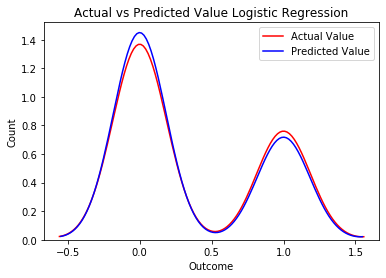

In [212]:
ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(y_pred_LogReg, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

### Decision Tree

In [213]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [214]:
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)

1.0

In [215]:
y_pred_dtc=dtc.predict(X_test)

In [216]:
model_evaluate("Decision Tree Classifier:",y_test,y_pred_dtc)

-----------{model_name}--------------
Confusion Matrix:
 [[75 24]
 [18 37]]
Classification Report:\.               precision    recall  f1-score   support

           0       0.81      0.76      0.78        99
           1       0.61      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

Accuracy Score:
 0.7272727272727273


Text(0, 0.5, 'Count')

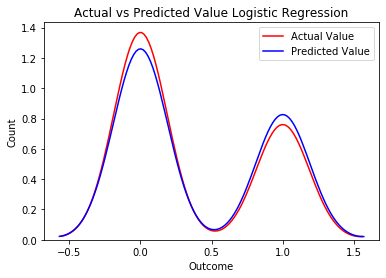

In [217]:
ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(y_pred_dtc, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

### Random Forest

In [218]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [219]:
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)

1.0

In [220]:
y_pred_rfc=rfc.predict(X_test)

In [221]:
model_evaluate("Random Forest Classifier:",y_test,y_pred_rfc)

-----------{model_name}--------------
Confusion Matrix:
 [[80 19]
 [16 39]]
Classification Report:\.               precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154

Accuracy Score:
 0.7727272727272727


Text(0, 0.5, 'Count')

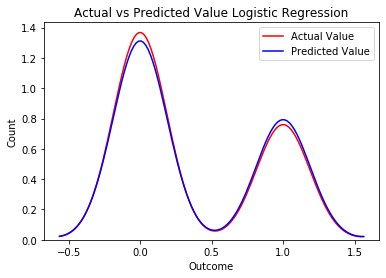

In [222]:
ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(y_pred_rfc, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

### Support vector machine(svm)

In [223]:
from sklearn.svm import SVC
svc=SVC()

In [224]:
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

0.8241042345276873

In [225]:
y_pred_svc=svc.predict(X_test)

In [226]:
model_evaluate("Support Vactor Machine",y_test,y_pred_svc)

-----------{model_name}--------------
Confusion Matrix:
 [[82 17]
 [24 31]]
Classification Report:\.               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Accuracy Score:
 0.7337662337662337


Text(0, 0.5, 'Count')

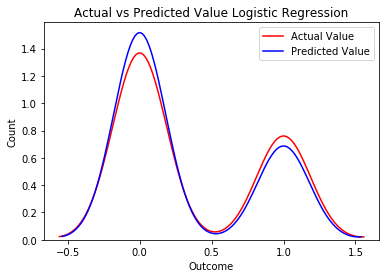

In [227]:
ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(y_pred_svc, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

In [228]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [229]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [230]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [231]:
input_data=(6,148,72,35,79,33.6,0.627,50)
input_data_as_numpy_array=np.array(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshape)
print(std_data)
prediction=rfc.predict(std_data)
print("Predicted Class:",prediction)
if prediction==0:
    print("No Diabetes")
else:
    print("Diabetes")

<IPython.core.display.Javascript object>

[[ 0.68185612  0.86976516 -0.00962449  0.95141264 -0.42448405  0.18064664
   0.46894005  1.48710085]]
Predicted Class: [1]
Diabetes


C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [235]:
## pickle for Deployment
import pickle
# serialize and save the scaler object
with open("scaler.pkl","wb") as scaler_file:
    pickle.dump(scaler,scaler_file)
    
    
# Serialize and save the rfe (random foredt classifier) object
with open("rfc.pkl","wb") as rfc_file:
    pickle.dump(rfc,rfc_file)

In [238]:
import pickle
# Loan the scaler object
with open("scaler.pkl","rb") as scaler_file:
    loaded_scaler=pickle.load(scaler_file)
    
with open("rfc.pkl","rb") as rfc_file:
    loaded_rfc=pickle.load(rfc_file)
    
input_data=(6,85,72,35,79,33.6,0.627,50)
input_data_as_numpy_array=np.array(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
std_data=loaded_scaler.transform(input_data_reshape)
print(std_data)
prediction=loaded_rfc.predict(std_data)
print("Predicted Class:",prediction)
if prediction==0:
    print("No Diabetes")
else:
    print("Diabetes")

<IPython.core.display.Javascript object>

[[ 0.68185612 -1.22481531 -0.00962449  0.95141264 -0.42448405  0.18064664
   0.46894005  1.48710085]]
Predicted Class: [0]
No Diabetes


C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
